##Analyzing Airline Passenger Satisfaction: A Data-Driven Approach##

**Sofia Mucci and Madison Klinefelter**

##Abstract##
This project delves into the multifaceted realm of airline passenger satisfaction analysis, employing a rich dataset encompassing diverse customer feedback. Beyond merely exploring the correlations between demographic attributes and satisfaction levels, our approach involves meticulous data preprocessing, encompassing the handling of missing values, categorical variable encoding, and outlier mitigation using the Interquartile Range (IQR) method. The ensuing exploratory data analysis illuminates crucial relationships, with a focus on factors such as departure delay, class, and their impact on overall satisfaction. Through a systematic progression, linear regression models identify pivotal features, while logistic regression emerges as a potent predictor of satisfaction, supported by commendable accuracy and F1 scores. The exploration extends to decision tree and random forest classifiers, providing nuanced insights into feature importance and hierarchical relationships. Hyperparameter tuning further refines the models, ultimately enhancing the accuracy of predictions. These findings contribute not only to a nuanced understanding of passenger satisfaction dynamics but also offer actionable insights for the airline industry in tailoring services to meet and exceed customer expectations.

##About The Dataset ##
This dataset, sourced from Kaggle, comprises information from airline passengers, including demographic details, travel preferences, and satisfaction ratings. Key attributes include gender, age, flight distance, departure delay, and overall satisfaction. The goal is to understand the relationships between these factors and passenger satisfaction.

##Mounting Google Drive and Importing Required Libraries##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/DSC101/Data/"

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
airplane_data = pd.read_csv(data_path+"airline_satisfaction.csv")
airplane_data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
airplane_data.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
airplane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
airplane_data.shape

(129880, 24)

In [ ]:
airplane_data.isnull()
airplane_data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [ ]:
airplane_data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [ ]:
airplane=airplane_data.drop(['Arrival Delay'],axis=1)

In [ ]:
for col in airplane.columns:
    if airplane[col].dtype == 'object':
        airplane[col] = airplane[col].factorize()[0]

In [ ]:
airplane.shape

(129880, 23)

In [ ]:
int_cols=airplane.select_dtypes(include='int').columns
int_cols

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
selected_cols=['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction']

In [ ]:
for col in airplane.columns:
    if airplane[col].dtype == 'object':
        airplane[col] = airplane[col].factorize()[0]

In [ ]:
Q1 = airplane[selected_cols].quantile(0.25)
Q3 = airplane[selected_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

ID                                        64939.5
Gender                                        1.0
Age                                          24.0
Customer Type                                 0.0
Type of Travel                                1.0
Class                                         1.0
Flight Distance                            1330.0
Departure Delay                              12.0
Departure and Arrival Time Convenience        2.0
Ease of Online Booking                        2.0
Check-in Service                              1.0
Online Boarding                               2.0
Gate Location                                 2.0
On-board Service                              2.0
Seat Comfort                                  3.0
Leg Room Service                              2.0
Cleanliness                                   2.0
Food and Drink                                2.0
In-flight Service                             2.0
In-flight Wifi Service                        2.0


In [ ]:
airplane_truncated = airplane[~((airplane[selected_cols] < (Q1 - 1.5 * IQR)) | (airplane[selected_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
airplane_truncated.shape

(78316, 23)

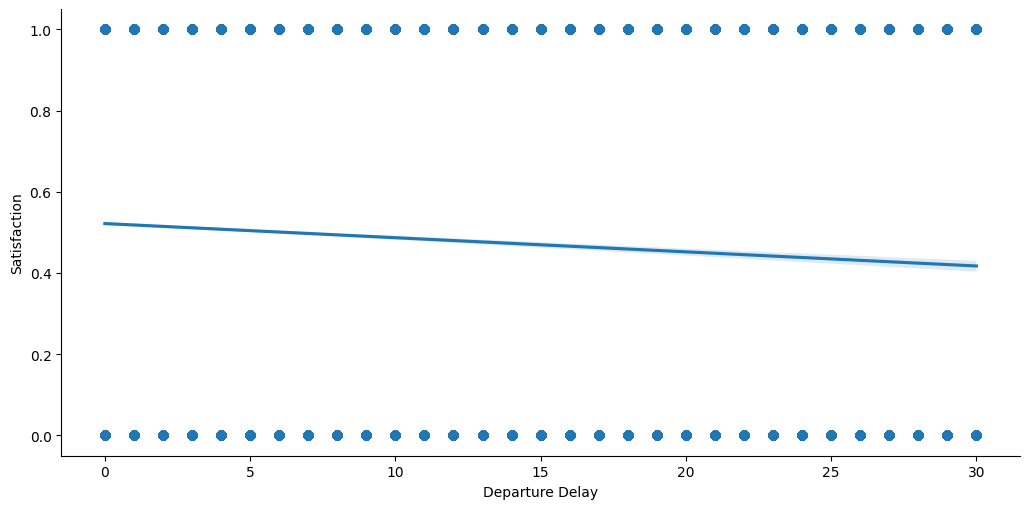

In [ ]:
sns.lmplot(x="Departure Delay", y="Satisfaction", data = airplane_truncated, height = 5.2, aspect = 2);
plt.show()

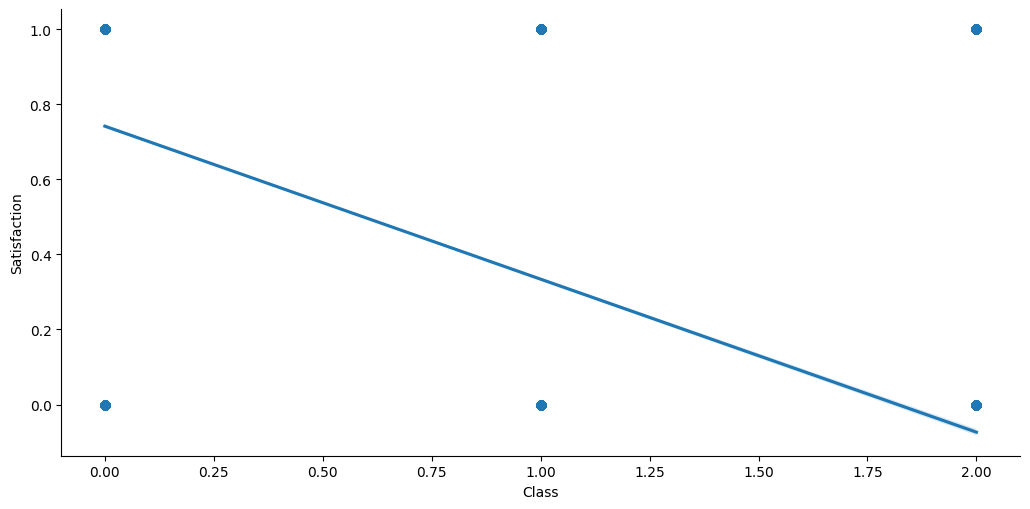

In [ ]:
sns.lmplot(x="Class", y="Satisfaction", data = airplane_truncated, height = 5.2, aspect = 2);
plt.show()

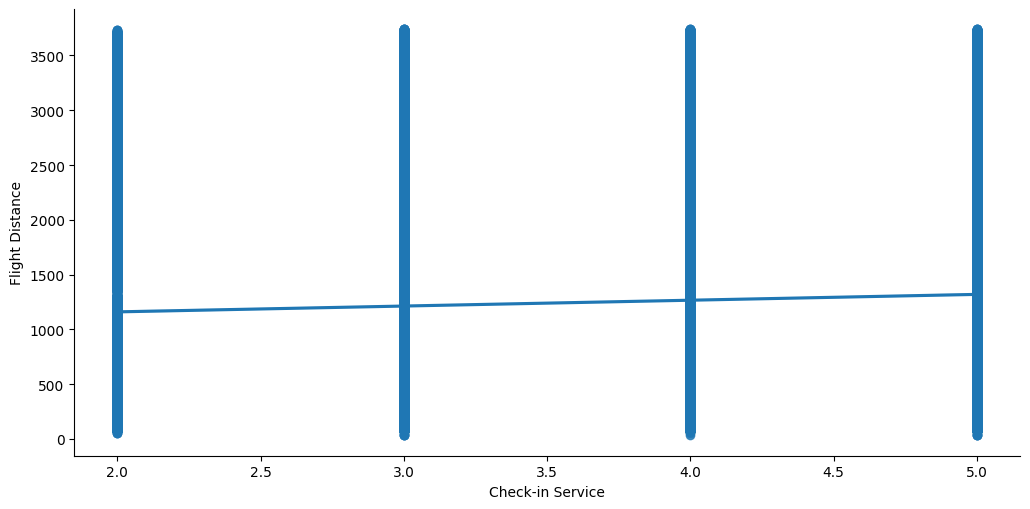

In [ ]:
sns.lmplot(x="Check-in Service", y="Flight Distance", data = airplane_truncated, height = 5.2, aspect = 2);
plt.show()

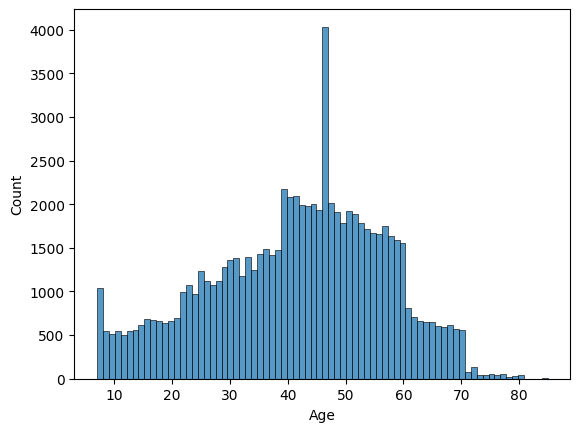

In [ ]:
#Frequency table for age
sns.histplot(x="Age", data=airplane_truncated)
plt.show()

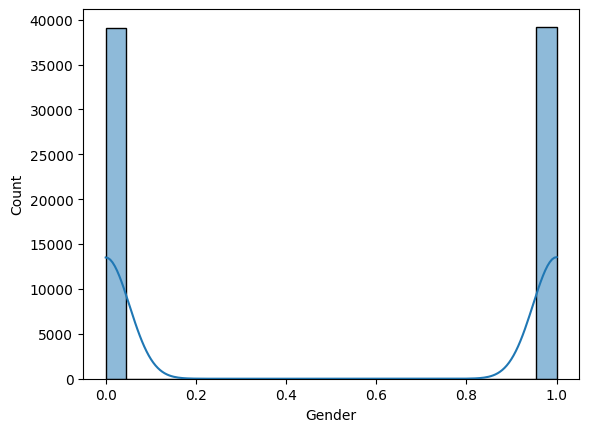

In [ ]:
#Frequency table for gender
sns.histplot(x="Gender", data=airplane_truncated, kde=True)

# Show the plot
plt.show()

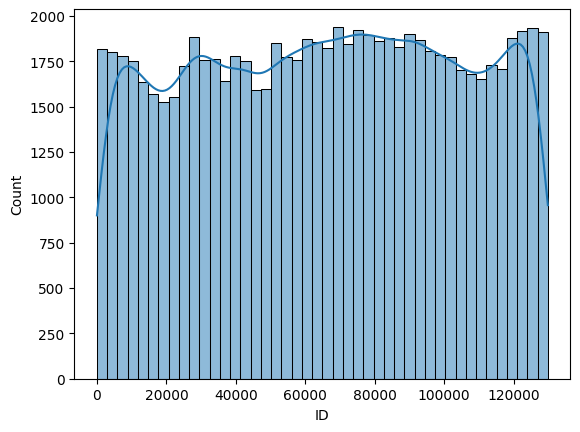

In [ ]:
#Frequency table for ID
sns.histplot(x="ID", data=airplane_truncated, kde=True)

# Show the plot
plt.show()

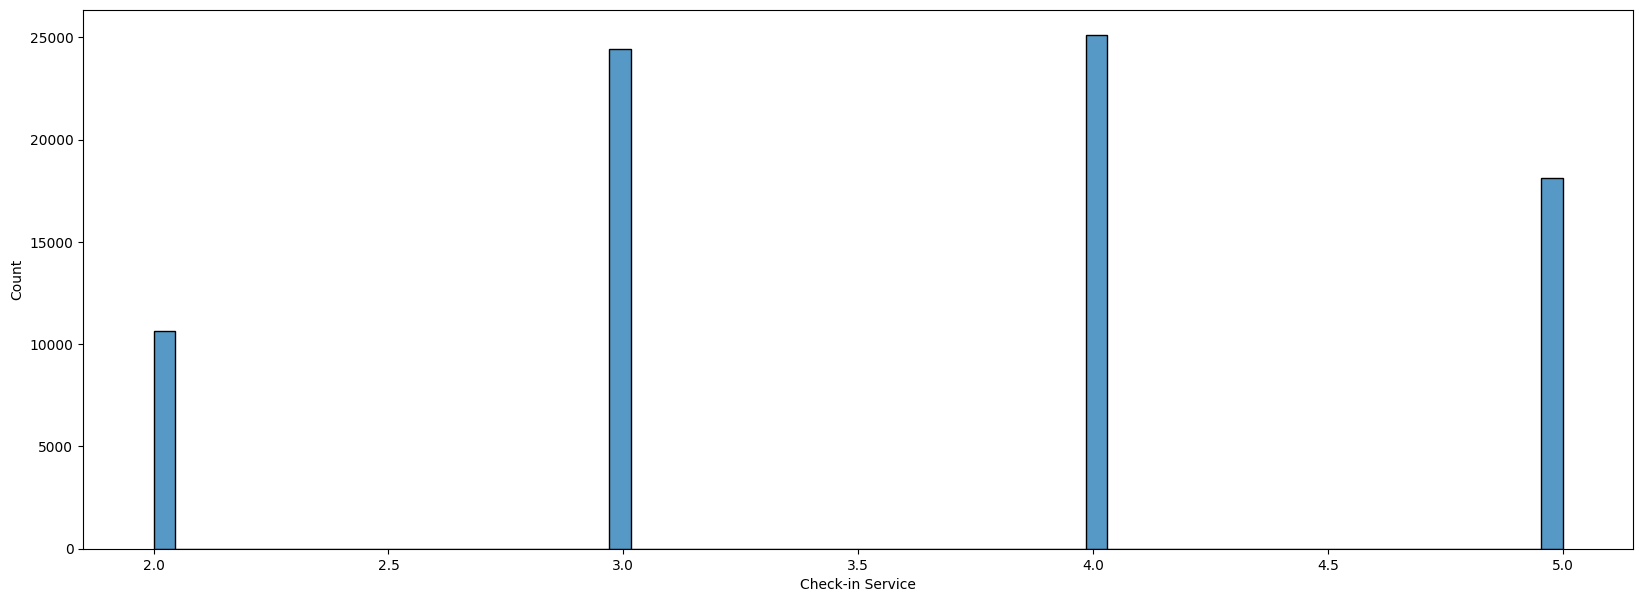

In [ ]:
# Plot a frequency histogram of the total crop land of Armenia
plt.figure(figsize=(20, 7))
sns.histplot(x="Check-in Service", data=airplane_truncated)

# Show the plot
plt.show()

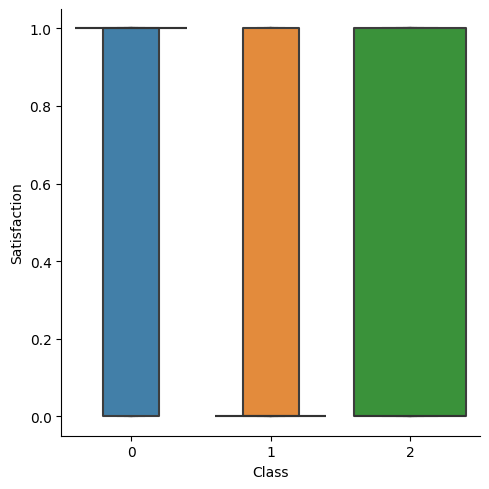

In [ ]:
sns.catplot(data=airplane_truncated, kind="boxen", x="Class", y="Satisfaction")
plt.show()

<Figure size 2000x1000 with 0 Axes>

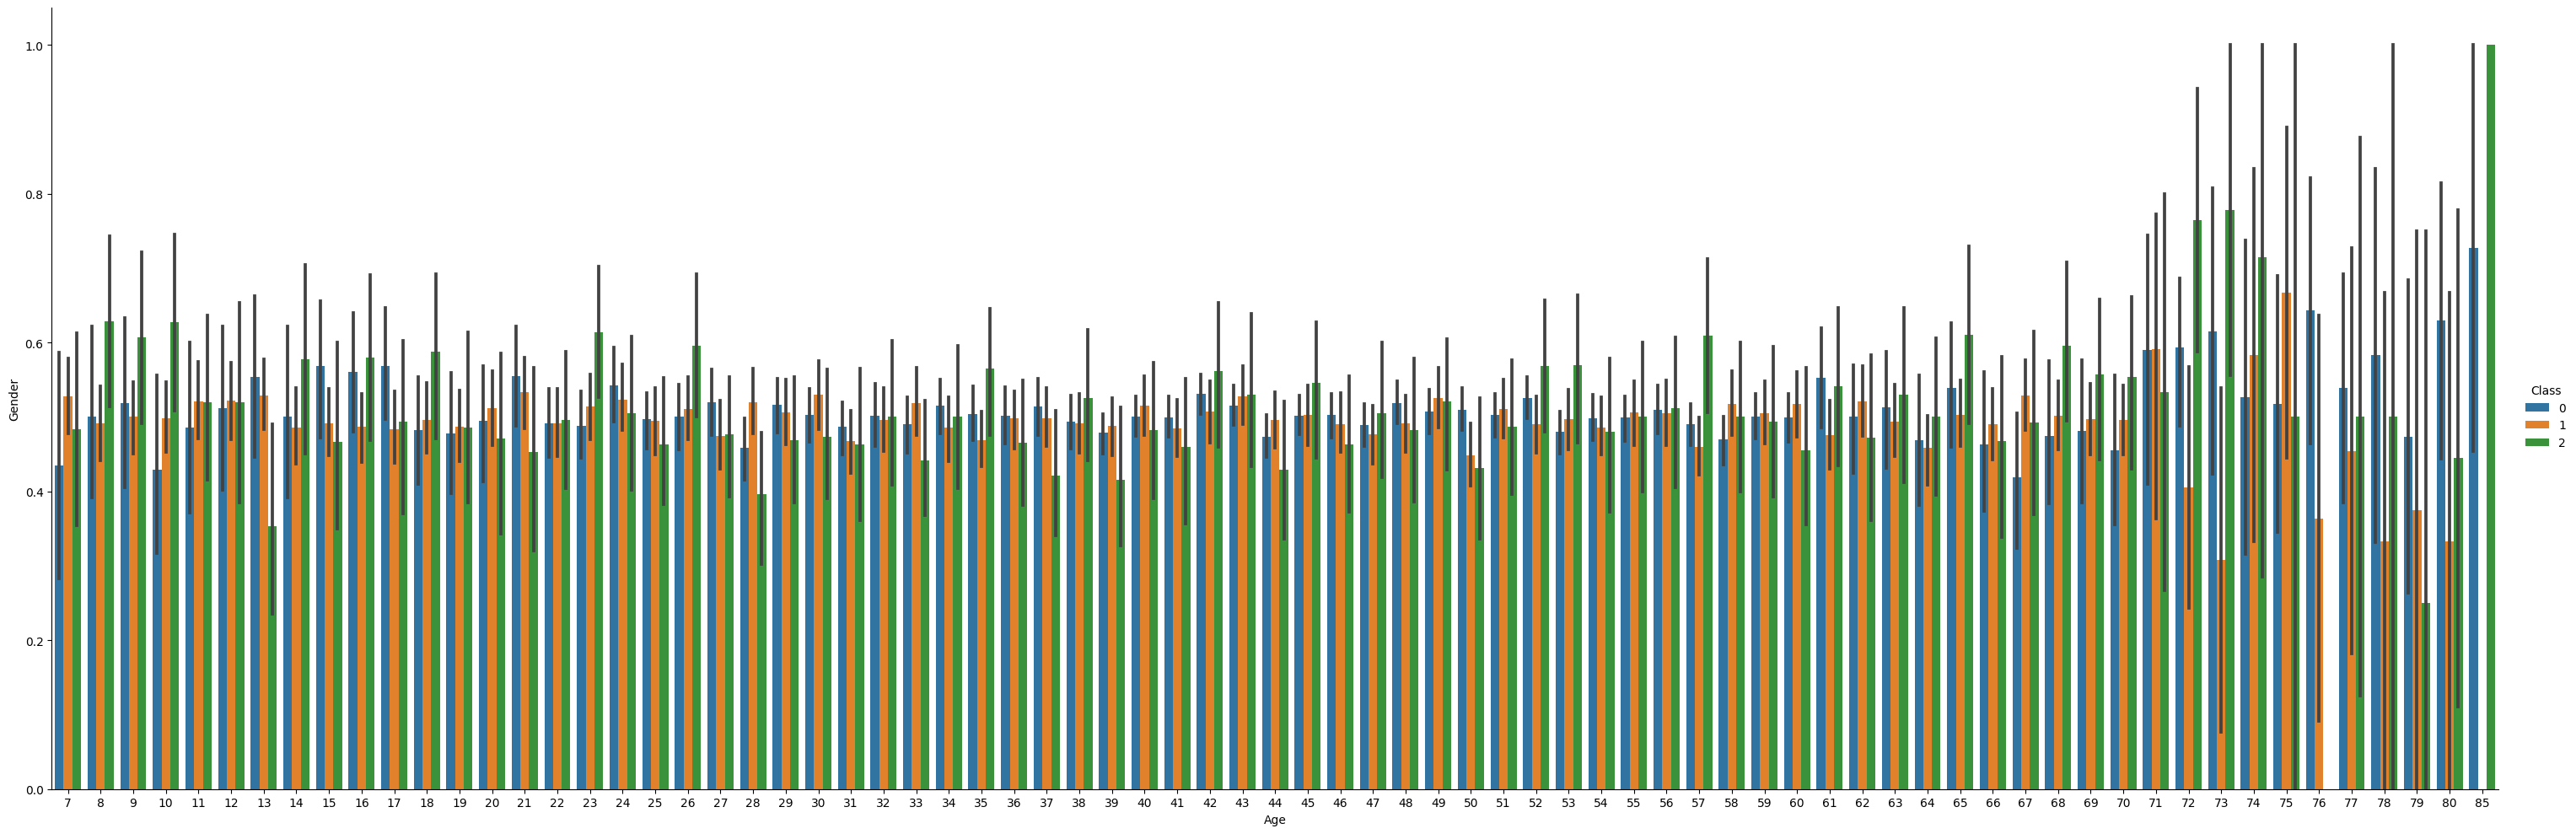

In [ ]:
plt.figure(figsize=(20, 10))
sns.catplot(data=airplane_truncated, kind="bar", x="Age", y="Gender", hue="Class", height=10, aspect=3)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
X = airplane_truncated.drop('Satisfaction', axis=1)
y = airplane_truncated['Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression(fit_intercept = True)
lr.fit(X_train_scaled, y_train)

K= X.shape[1]

rmse=[]
r2=[]

for i in range(1,K+1):
  # Out of 14 x input features select k
  rfe = RFE(estimator=lr, n_features_to_select=i)
  # fit the RFE object to the data
  rfe.fit(X_train_scaled, y_train)

  # select only the selected features
  X_selected = X[X.columns[rfe.support_]]

  X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


  lr = LinearRegression(fit_intercept = True)
  lr.fit(X_selected_train, y_train)

  y_pred = lr.predict(X_selected_test)
  rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

  r2.append(r2_score(y_test, y_pred))

In [ ]:
rmse

[0.39040990826736366,
 0.3598748902686404,
 0.34117766499817087,
 0.33962084527012243,
 0.3345452260049831,
 0.3291115005976038,
 0.3234634202091245,
 0.3206505716425819,
 0.3180340944602211,
 0.31734221093015913,
 0.31675563084636593,
 0.31643831671393075,
 0.3158215805814042,
 0.3154832177911638,
 0.3153044627615792,
 0.31511000519623955,
 0.31502928156935456,
 0.3150002142025347,
 0.3149083834172078,
 0.3148901275021143,
 0.3148876037661898,
 0.3148876037661898]

In [ ]:
d={'k': range(1,K+1), 'rmse': rmse}
airline_rmse=pd.DataFrame(data=d)

In [ ]:
airline_rmse

,k,rmse
0,1,0.390410
1,2,0.359875
2,3,0.341178
3,4,0.339621
4,5,0.334545
5,6,0.329112
6,7,0.323463
7,8,0.320651
8,9,0.318034
9,10,0.317342


In [ ]:
airline_rmse.max()

k       22.00000
rmse     0.39041
dtype: float64

In [ ]:
airline_rmse.min()

k       1.000000
rmse    0.314888
dtype: float64

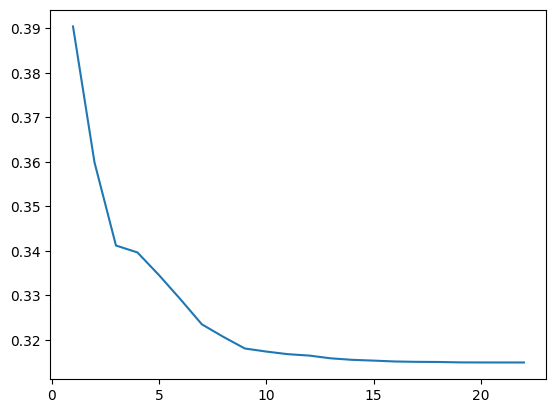

In [ ]:
plt.plot(range(1,K+1),rmse)

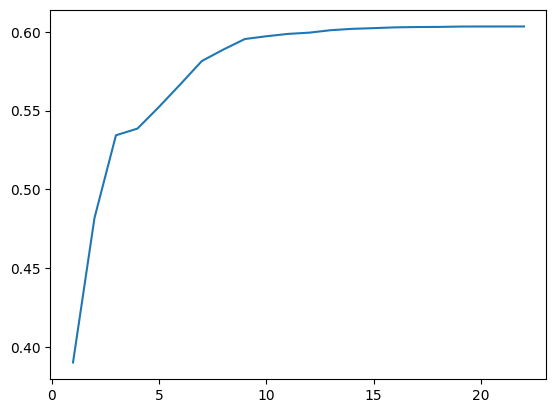

In [ ]:
plt.plot(range(1,K+1),r2)

In [ ]:
# Out of 14 x input features select k
rfe = RFE(estimator=lr, n_features_to_select=50)
# fit the RFE object to the data
rfe.fit(X_train_scaled, y_train)

# select only the selected features
X_selected = X[X.columns[rfe.support_]]

X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=5)


scaler = StandardScaler()
X_selected_train_scaled= scaler.fit_transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

lr = LinearRegression(fit_intercept = True)
lr.fit(X_selected_train_scaled, y_train)

y_pred = lr.predict(X_selected_test_scaled)

In [ ]:
rmse= np.sqrt(mean_squared_error(y_test, y_pred))

r2=r2_score(y_test, y_pred)

In [ ]:
print("Root Mean Squared Error on train data:", rmse)
print("R-squared on train data:", r2)

Root Mean Squared Error on train data: 0.3114392936374533
R-squared on train data: 0.6118582455327233


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
K = X.shape[1]

In [ ]:
accuracy=[]
f1=[]

In [ ]:
for i in range(1,K+1):
  # Out of 14 x input features select k
  rfe = RFE(estimator=lr, n_features_to_select=i)
  # fit the RFE object to the data
  rfe.fit(X_train_scaled, y_train)

  # select only the selected features
  X_selected = X[X.columns[rfe.support_]]

  X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


  logreg = LogisticRegression(max_iter=1000)
  logreg.fit(X_selected_train, y_train)

  y_pred = logreg.predict(X_selected_test)
  accuracy.append(accuracy_score(y_test, y_pred))

  f1.append(f1_score(y_test, y_pred))

In [ ]:
accuracy

[0.6288304392236976,
 0.8221399387129724,
 0.8592951991828396,
 0.8648493360572013,
 0.8760214504596527,
 0.8790858018386108,
 0.880426455566905,
 0.8822139938712973,
 0.8837461695607763,
 0.8850229826353422,
 0.8844484167517875,
 0.8841292134831461,
 0.8845760980592441,
 0.8845122574055159,
 0.5072139938712973,
 0.5072139938712973,
 0.8341419816138917,
 0.8400791624106231,
 0.7981358529111338,
 0.8473569969356486,
 0.8430796731358529,
 0.8453779366700716]

In [ ]:
f1

[0.6781800066423115,
 0.8271497704429829,
 0.8613662095861114,
 0.8668302195382777,
 0.877057482907065,
 0.8798223350253808,
 0.8812979276253249,
 0.8830576155162579,
 0.8848124486052249,
 0.8858754198086305,
 0.8853850050658563,
 0.8850028511689794,
 0.885395537525355,
 0.8852812480182636,
 0.6730484137405227,
 0.6730484137405227,
 0.8411980440097799,
 0.848448181983181,
 0.8073830409356726,
 0.8540916580216024,
 0.8503774044314584,
 0.8522810441571115]

In [ ]:
K1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,]

In [ ]:
df = {'K': K1,
      'accuracy': accuracy,
      'f1': f1}
k_best = pd.DataFrame(data=df)
k_best

,K,accuracy,f1
0,1,0.628830,0.678180
1,2,0.822140,0.827150
2,3,0.859295,0.861366
3,4,0.864849,0.866830
4,5,0.876021,0.877057
5,6,0.879086,0.879822
6,7,0.880426,0.881298
7,8,0.882214,0.883058
8,9,0.883746,0.884812
9,10,0.885023,0.885875


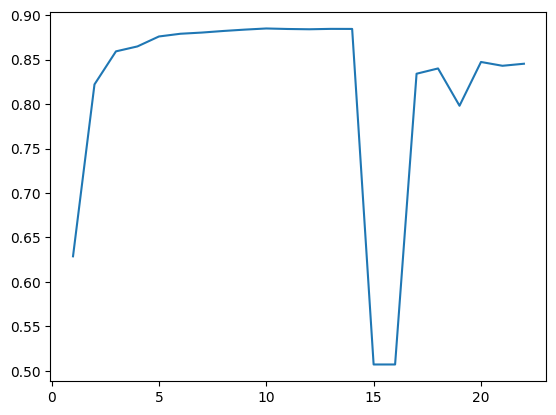

In [ ]:
plt.plot(range(1,K+1),accuracy)

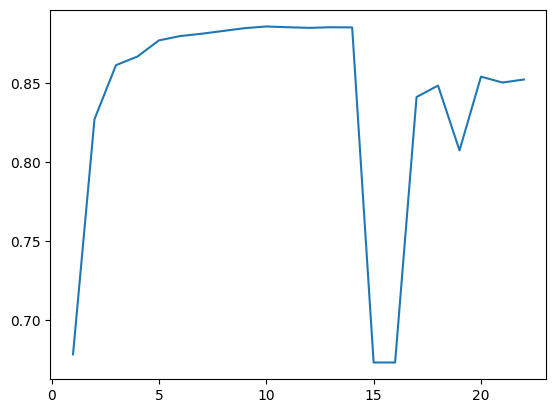

In [ ]:
plt.plot(range(1,K+1),f1)

In [ ]:
k_best[(k_best['accuracy'] == max(k_best['accuracy'])) & (k_best['f1'] == max(k_best['f1']))]

,K,accuracy,f1
9,10,0.885023,0.885875


In [ ]:
rfe = RFE(estimator=lr, n_features_to_select=10)
# fit the RFE object to the data
rfe.fit(X_train_scaled, y_train)

# select only the selected features
X_selected = X[X.columns[rfe.support_]]

X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_selected_train, y_train)

y_pred = logreg.predict(X_selected_test)

In [ ]:
y_pred = lr.predict(X_test_scaled)
cm=confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print(accuracy)

[[1838 5881]
 [ 934 7011]]
              precision    recall  f1-score   support

           0       0.66      0.24      0.35      7719
           1       0.54      0.88      0.67      7945

    accuracy                           0.56     15664
   macro avg       0.60      0.56      0.51     15664
weighted avg       0.60      0.56      0.51     15664

0.5649259448416751


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [ ]:
dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
dtc.get_depth()

2

In [ ]:
dtc.get_n_leaves()

4

In [ ]:
dtc.get_params(['Age'])

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
dot_data = export_graphviz(dtc, out_file=None, feature_names=X.columns, class_names=str(y.unique()), filled=True, rounded=True)

In [ ]:
y_pred = dtc.predict(X_test_scaled)

In [ ]:
K = X.shape[1]
accuracy=[]
f1=[]

for i in range(1,K+1):
  # Out of 14 x input features select k
  rfe = RFE(estimator=dtc, n_features_to_select=i)
  # fit the RFE object to the data
  rfe.fit(X_train_scaled, y_train)

  # select only the selected features
  X_selected = X[X.columns[rfe.support_]]

  X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


  dtc = DecisionTreeClassifier(criterion='entropy')
  dtc.fit(X_selected_train, y_train)

  y_pred = dtc.predict(X_selected_test)
  accuracy.append(accuracy_score(y_test, y_pred))

  f1.append(f1_score(y_test, y_pred))

In [ ]:
accuracy

[0.8064989785495403,
 0.7466802860061287,
 0.8114785495403473,
 0.9034090909090909,
 0.9006001021450459,
 0.9160495403472931,
 0.9272854954034729,
 0.9353932584269663,
 0.9431818181818182,
 0.9459908069458631,
 0.9492466802860061,
 0.9546731358529111,
 0.9533963227783453,
 0.9546731358529111,
 0.9558222676200204,
 0.9579290091930541,
 0.9589504596527069,
 0.95920582226762,
 0.957035240040858,
 0.9576098059244127,
 0.9571629213483146,
 0.9575459652706844]

In [ ]:
f1

[0.8265720661440751,
 0.7512225705329153,
 0.8148705410319101,
 0.9045486089205729,
 0.9019089019089019,
 0.9173007986919061,
 0.9283422459893048,
 0.9360545937065589,
 0.943834406159283,
 0.9467991447616653,
 0.949977977726043,
 0.9552614996849401,
 0.9541572469228837,
 0.9553964065837416,
 0.956510809451986,
 0.9586289158139243,
 0.9595877066180629,
 0.9598138481856487,
 0.957750015694645,
 0.9583019341873902,
 0.957822616129235,
 0.9581945055635884]

In [ ]:
len(f1)

22

In [ ]:
len(accuracy)

22

In [ ]:
K1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [ ]:
df = {'K': K1,
      'accuracy': accuracy,
      'f1': f1}
k_best = pd.DataFrame(data=df)
k_best

,K,accuracy,f1
0,1,0.806499,0.826572
1,2,0.746680,0.751223
2,3,0.811479,0.814871
3,4,0.903409,0.904549
4,5,0.900600,0.901909
5,6,0.916050,0.917301
6,7,0.927285,0.928342
7,8,0.935393,0.936055
8,9,0.943182,0.943834
9,10,0.945991,0.946799


In [ ]:
k_best[(k_best['accuracy'] == max(k_best['accuracy'])) & (k_best['f1'] == max(k_best['f1']))]

,K,accuracy,f1
17,18,0.959206,0.959814


In [ ]:
# the best model so far is with k=9
rfe = RFE(estimator=dtc, n_features_to_select=18)
# fit the RFE object to the data
rfe.fit(X_train_scaled, y_train)

# select only the selected features
X_selected = X[X.columns[rfe.support_]]

X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


dtc = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dtc.fit(X_selected_train, y_train)

y_pred = dtc.predict(X_selected_test)

In [ ]:
cm=confusion_matrix(y_test, y_pred)
scores=classification_report(y_test, y_pred, zero_division=1)
accuracy=accuracy_score(y_test, y_pred)
print(cm)
print(scores)
print(accuracy)

[[7352  367]
 [1850 6095]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7719
           1       0.94      0.77      0.85      7945

    accuracy                           0.86     15664
   macro avg       0.87      0.86      0.86     15664
weighted avg       0.87      0.86      0.86     15664

0.8584652706843718


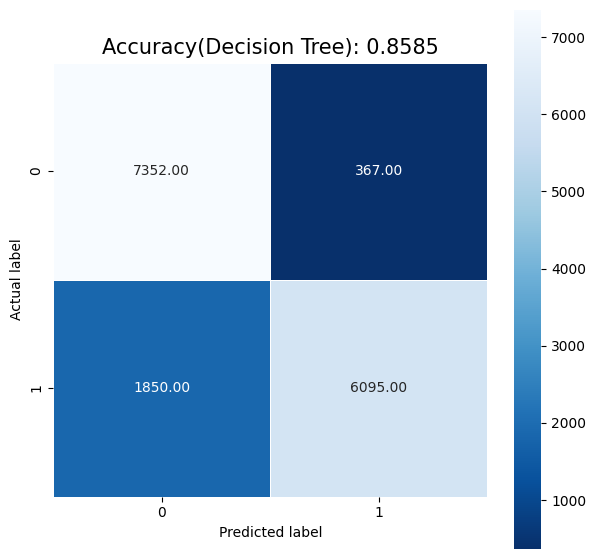

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy(Decision Tree): {:.4f}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
import graphviz

In [ ]:
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='png')
graph.view()

'decision_tree.pdf'

In [ ]:
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('decision_tree', view=True, format='png', cleanup=True)
graph.render('decision_tree', view=True, format='png', cleanup=True)

'decision_tree.png'

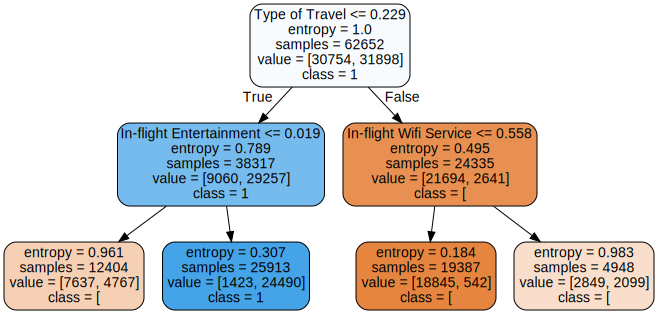

In [ ]:
graph

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, classification_report
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score

In [ ]:
rfc = RandomForestClassifier(n_estimators=20, max_depth=7, min_samples_leaf=5)

In [ ]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, n_estimators=20)

In [ ]:
K1 = X.shape[1]
accuracy=[]
f1=[]
y_pred = rfc.fit(X_train_scaled, y_train)

for i in range(1,K+1):
  # Out of 14 x input features select k
  rfe = RFE(estimator=rfc, n_features_to_select=i)
  # fit the RFE object to the data
  rfe.fit(X_train_scaled, y_train)

  # select only the selected features
  X_selected = X[X.columns[rfe.support_]]

  X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


  rfc = RandomForestClassifier(n_estimators=20, max_depth=7, min_samples_leaf=5)
  rfc.fit(X_selected_train, y_train)

  y_pred = rfc.predict(X_selected_test)
  accuracy.append(accuracy_score(y_test, y_pred))

  f1.append(f1_score(y_test, y_pred))

In [ ]:
accuracy

[0.8064989785495403,
 0.8064989785495403,
 0.9325842696629213,
 0.9091547497446374,
 0.9384576098059244,
 0.9389683350357507,
 0.9367977528089888,
 0.9406281920326864,
 0.9478421859039836,
 0.9440755873340143,
 0.9459269662921348,
 0.9457354443309499,
 0.9477783452502554,
 0.9462461695607763,
 0.9417134831460674,
 0.947906026557712,
 0.9449055158324822,
 0.9495020429009193,
 0.9463100102145046,
 0.9459269662921348,
 0.9438840653728294,
 0.9422242083758938]

In [ ]:
f1

[0.8265720661440751,
 0.8265720661440751,
 0.9331899278754904,
 0.9089862488007676,
 0.9380781089414182,
 0.9389215435727064,
 0.9373893245636226,
 0.9408020369191599,
 0.9483532460964662,
 0.9444373969301026,
 0.9463890119627825,
 0.946311268317332,
 0.9482212938346625,
 0.9468098547062539,
 0.9419248139431333,
 0.9484262419416003,
 0.9451401690928739,
 0.9498637256766178,
 0.9465658555181397,
 0.9463006403347491,
 0.9439449014731203,
 0.9423530161156761]

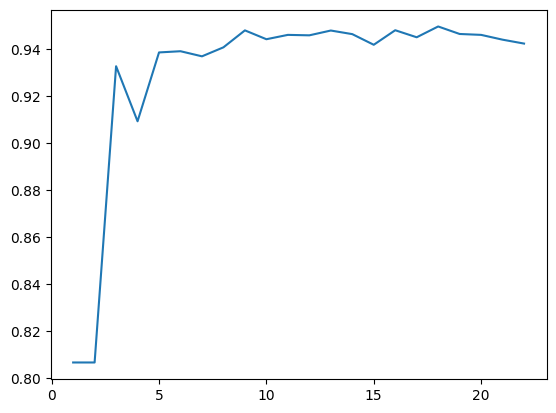

In [ ]:
plt.plot(range(1,K+1),accuracy)

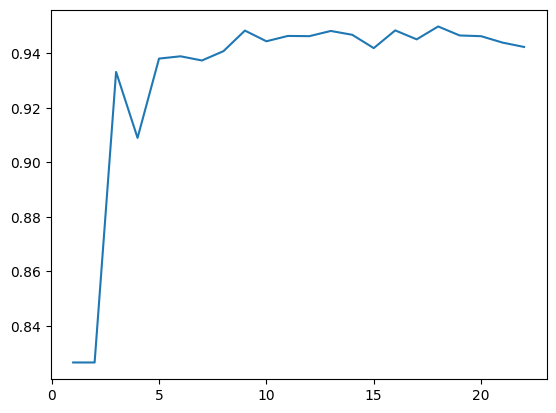

In [ ]:
plt.plot(range(1,K+1),f1)

In [ ]:
K1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [ ]:
df = {'K': K1,
      'accuracy': accuracy,
      'f1': f1}
k_best = pd.DataFrame(data=df)
k_best

,K,accuracy,f1
0,1,0.806499,0.826572
1,2,0.806499,0.826572
2,3,0.932584,0.933190
3,4,0.909155,0.908986
4,5,0.938458,0.938078
5,6,0.938968,0.938922
6,7,0.936798,0.937389
7,8,0.940628,0.940802
8,9,0.947842,0.948353
9,10,0.944076,0.944437


In [ ]:
k_best[(k_best['accuracy'] == max(k_best['accuracy'])) | (k_best['f1'] == max(k_best['f1']))]

,K,accuracy,f1
17,18,0.949502,0.949864


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
# the best model so far is with k=9
rfe = RFE(estimator=rfc, n_features_to_select=18)
# fit the RFE object to the data
rfe.fit(X_train_scaled, y_train)

# select only the selected features
X_selected = X[X.columns[rfe.support_]]

X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


rfc = RandomForestClassifier(n_estimators=20, max_depth=7, min_samples_leaf=5)
rfc.fit(X_selected_train, y_train)

y_pred = rfc.predict(X_selected_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
report=classification_report(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(accuracy)
print(cm)
print(report)

0.9456716036772217
[[7362  357]
 [ 494 7451]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7719
           1       0.95      0.94      0.95      7945

    accuracy                           0.95     15664
   macro avg       0.95      0.95      0.95     15664
weighted avg       0.95      0.95      0.95     15664



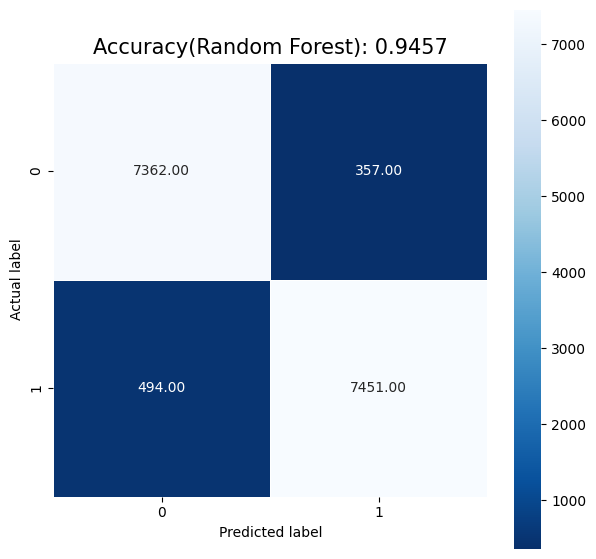

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy(Random Forest): {:.4f}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

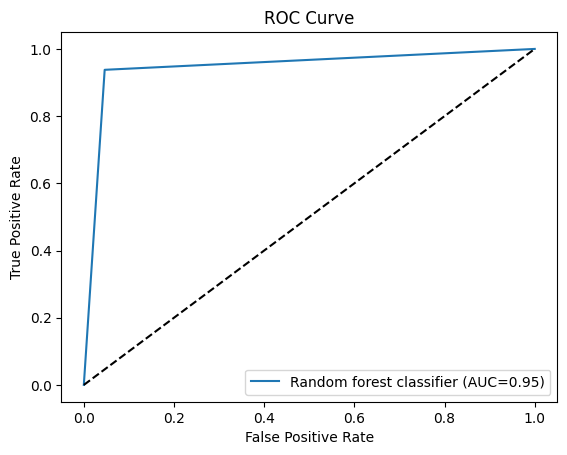

In [ ]:
plt.plot(fpr, tpr, label=f'Random forest classifier (AUC={accuracy:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
y_pred_prob = rfc.predict_proba(X_selected_test)[:, 1]

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

In [ ]:
auprc = auc(recall, precision)
print("Area under the PR curve (AUPRC):", auprc)

Area under the PR curve (AUPRC): 0.9903051391621421


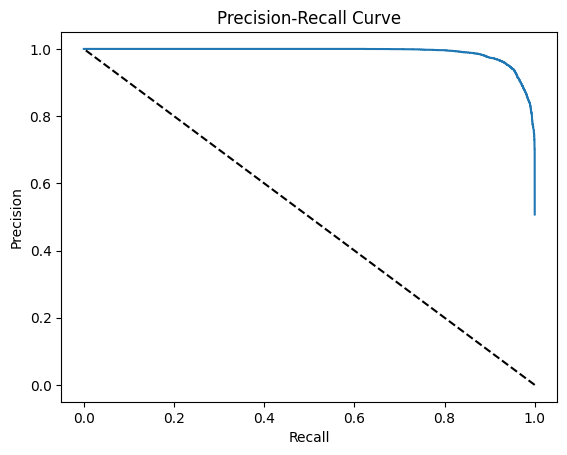

In [ ]:
plt.plot(recall, precision, label=f'(AUPRC={auprc:.2f})')
plt.plot([1, 0], [0, 1], 'k--')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {'n_estimators': [50, 100,150, 200],
              'max_depth': [5, 10, 15, 20],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
rand_search = RandomizedSearchCV(estimator=rfc,
                                 param_distributions=param_dist,
                                 cv=5,
                                 n_iter=10,
                                 scoring='accuracy')

In [ ]:
rand_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=7,
                                                    min_samples_leaf=5,
                                                    n_estimators=20),
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'min_samples_leaf': [1, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='accuracy')

In [ ]:
print("Best Hyperparameters:", rand_search.best_params_)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_leaf': 1, 'max_depth': 15}


In [ ]:
y_pred = rand_search.predict(X_test_scaled)

In [ ]:
cm=confusion_matrix(y_test, y_pred)
accuracy = rand_search.score(X_test_scaled, y_test)
report=classification_report(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(accuracy)
print(cm)
print(report)

0.9682073544433095
[[7610  109]
 [ 389 7556]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7719
           1       0.99      0.95      0.97      7945

    accuracy                           0.97     15664
   macro avg       0.97      0.97      0.97     15664
weighted avg       0.97      0.97      0.97     15664



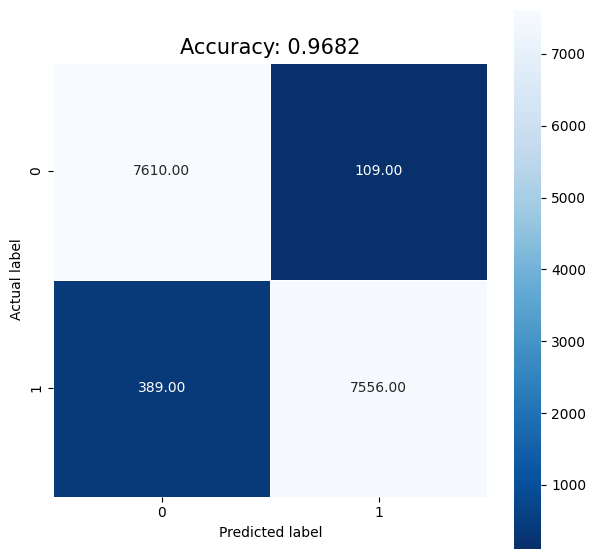

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy: {:.4f}'.format(accuracy)
plt.title(all_sample_title, size = 15);

##Results##
 Through robust data preprocessing, handling missing values, encoding categorical variables, and addressing outliers, the dataset was refined for analysis. Exploratory data analysis unveiled significant relationships, particularly in departure delay, class, and overall satisfaction. Employing linear regression, logistic regression, decision tree classifier, and random forest classifier models, the project achieved a notable accuracy of 97%. The predictive models, after rigorous evaluation and hyperparameter tuning, demonstrated substantial success in understanding and forecasting passenger satisfaction dynamics. These outcomes validate the effectiveness of our analytical approach.

##Conclusion##

Our analysis elucidates the intricate dynamics of passenger satisfaction, unearthing the profound impact of variables such as departure delay, class, and check-in service on overall satisfaction levels. Using sophisticated machine learning models, particularly adept random forest classifiers, has proven effective in accurately predicting and identifying nuanced patterns in passenger satisfaction. These data-driven revelations empower airlines with actionable insights and provide a roadmap for strategic interventions. By implementing targeted strategies informed by our models, airlines can optimize their operations, effectively mitigate departure delays, enhance class-specific services, and streamline check-in processes. The amalgamation of these data-driven initiatives promises a holistic improvement in overall service quality. The project's outcomes underscore the tangible utility of advanced data science methodologies in steering airlines toward data-informed decision-making and elevating the passenger experience to unprecedented heights.